In [1]:
import os
from game_simulation1 import *
import matplotlib.pyplot as plt

### (k+1) SA_EA using strategy 2

In [2]:
def sa_esk(iterations,num_games,k,tau,features):
      W = [(np.zeros(7),100 * np.ones(7), simulation(np.zeros(7),features,3)) for i in range(k)]

      learning_curve =[]
      std=[]

      for t in range(iterations):
        if t%5==0:
           Wp = []
           for i in range(k):
               wp,Sigmap,scorep = W[i]
               scorep = simulation(wp,features,3)
               Wp.append((wp,Sigmap,scorep))
           W=Wp
        w,Sigma,score = W[np.random.randint(0, k)]
        new_Sigma = Sigma * np.exp(tau * np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w))))
        new_w = w+new_Sigma*np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w)))
        new_score  = simulation(new_w,features,3)
        W.append((new_w,new_Sigma,new_score))
        W.sort(reverse=True, key=lambda x: x[2])
        W = W[:k]
        game_scores = [simulation(W[0][0],features,3) for _ in range(num_games)]

        learning_curve.append(np.mean(game_scores))

        if t%20 ==0:
          # print("Iteration {}: Average score of best samples: {},{}".format(t+1, simulation2(W[0][0],features),W[0][2]))
          print("Iteration {}: Average score of best samples: {}".format(t+1,W[0][2]))
      return learning_curve,std,W

### Evaluation using features DU2 Strategy 2

In [3]:
np.random.seed(42)
learning_curve_sa_es,std_WN,W=sa_esk(150,1,5,0.1,2)

Iteration 1: Average score of best samples: 0.3333333333333333
Iteration 21: Average score of best samples: 91.0
Iteration 41: Average score of best samples: 246.66666666666666
Iteration 61: Average score of best samples: 1078.3333333333333
Iteration 81: Average score of best samples: 1189.0
Iteration 101: Average score of best samples: 2391.0
Iteration 121: Average score of best samples: 1629.6666666666667
Iteration 141: Average score of best samples: 3411.0


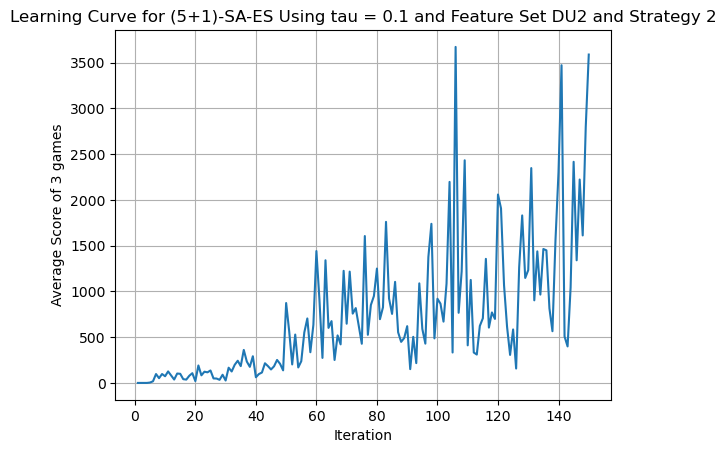

<Figure size 640x480 with 0 Axes>

In [4]:
plt.plot(range(1, 150 + 1), learning_curve_sa_es, '-', label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of 3 games')
plt.title('Learning Curve for (5+1)-SA-ES Using tau = 0.1 and Feature Set DU2 and Strategy 2')
plt.grid(True)
plt.show()
plt.savefig('learning_curve_5p1_SAES_DU2_Strategy2.png', dpi=300, bbox_inches='tight')